In [2]:
import tweepy
import csv
import pandas as pd
import sys
import re


consumer_key = "izfPcN1fk4eeK9YkvcxEW4vqI"
consumer_secret = "lSWwaWuuOBkzlv0nXDt4lnKSeso1dDcoBcDCqqDtm8wyD08rET"
access_token = "245387341-8x74UkFqyhDQjVhQqIw6uAhbRbjj5w4gDT5Gum4Y"
access_token_secret = "WaMkCNwixZBcpNiGRfIuyuy2vnb6Ooocrfxj9EVlpttgM"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# Search word/hashtag value 
HashValue = ""

# search start date value. the search will start from this date to the current date.
StartDate = ""

# getting the search word/hashtag and date range from user
HashValue = input("Enter the hashtag you want the tweets to be downloaded for: ")
StartDate = input("Enter the start date in this format yyyy-mm-dd: ")


#dataframe
df = pd.DataFrame()
tw = []



for tweet in tweepy.Cursor(api.search,q=HashValue,count=20,lang="en",since=StartDate, tweet_mode='extended').items():
    tw.append(tweet.full_text)
    
    

df['Tweets'] = tw   



df
#sys.exit()

Enter the hashtag you want the tweets to be downloaded for: #firstbank
Enter the start date in this format yyyy-mm-dd: 2019-05-01


,Tweets
0,RT @alutamama: If you have an account with @Fi...
1,If you have an account with @FirstBankngr bet...
2,"""Hardships often prepare ordinary people for a..."
3,@FirstBankngr y can y'all grow??? Why are you ...
4,Learn More https://t.co/PmZ3OuBzoN\n\n#rnetwo...
5,RT @aaron_udoh: First Bank of Nigeria are the ...
6,@IamChiomaa #Firstbank woke up this morning to...
7,#CommunityBanks are partnering with #DavidAlle...
8,@FBN_help cc @FirstBankngr You claimed yesterd...
9,RT @Deitytoro: Wow... it all started in 2014.....


In [3]:
# Clean tweets

pattern1 = re.compile(" ' # S % & ' ( ) * + , - . / : ; < = >  @ [ / ] ^ _ { | } ~ ?? ..")
pattern2 = re.compile("@[A-Za-z0-9]+") 
pattern3 = re.compile("https?://[A-Za-z0-9./]+")
tweetz = []
for item in df['Tweets']:
    tweet = re.sub(pattern1, "", item)   # version 1 of the tweet
    tweet = re.sub(pattern2, "", tweet)
    tweet = re.sub(pattern3, "", tweet)
    tweetz.append(tweet)
    
df['Tweets'] = tweetz
df

,Tweets
0,RT : If you have an account with better clos...
1,If you have an account with better close it ...
2,"""Hardships often prepare ordinary people for a..."
3,y can y'all grow??? Why are you people stagna...
4,Learn More \n\n#rnetwork #revvcard #revvcardg...
5,RT _udoh: First Bank of Nigeria are the worst ...
6,#Firstbank woke up this morning to see debit ...
7,#CommunityBanks are partnering with #DavidAlle...
8,_help cc You claimed yesterday that this earl...
9,RT : Wow... it all started in 2014... saving t...


In [4]:
for tw in df['Tweets']:
    print(tw,'\n')

RT : If you have an account with   better close it now I heard they would soon become insolvent. They are stealing s… 

If you have an account with   better close it now I heard they would soon become insolvent. They are stealing stipends from poor people! #theives #firstbank #firstofthieves 

"Hardships often prepare ordinary people for an extraordinary destiny." – C.S. Lewis

#MondayMotivation #FirstBank #MortgagExpert #CSLewisQuotes #Quoteoftheday #Quotes #Leadership  

 y can y'all grow??? Why are you people stagnant like gutter water? I bought credit via your useless app and my N8500 has been hanging for 5days now. No growth, no wonder everyone in d bank has body odour #firstbank #UgandaVsNigeria #UBAMarketplace19 #UBAMarketPlace 

Learn More  

#rnetwork #revvcard #revvcardglobal #Knoxville #idenitytheft #GetPaidToSave #CommunityBank #CreditCard #suntrust #firsttennessee #smartbank #firstbank #usbank #southeastbank #biometricpaymentcards 

RT _udoh: First Bank of Nigeria are the 

There are 7548 words in the combination of all tweets.


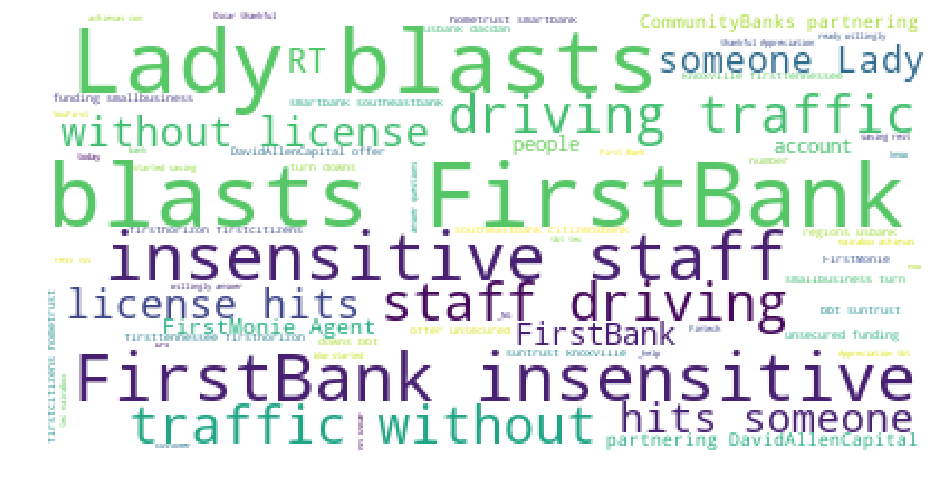

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df['Tweets'])
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

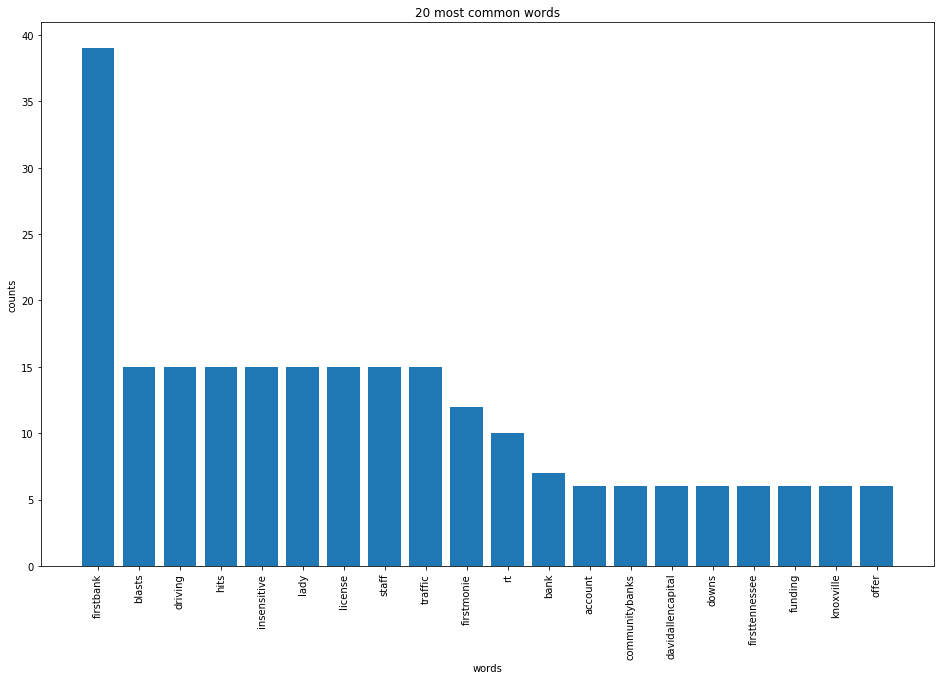

In [6]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Tweets'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

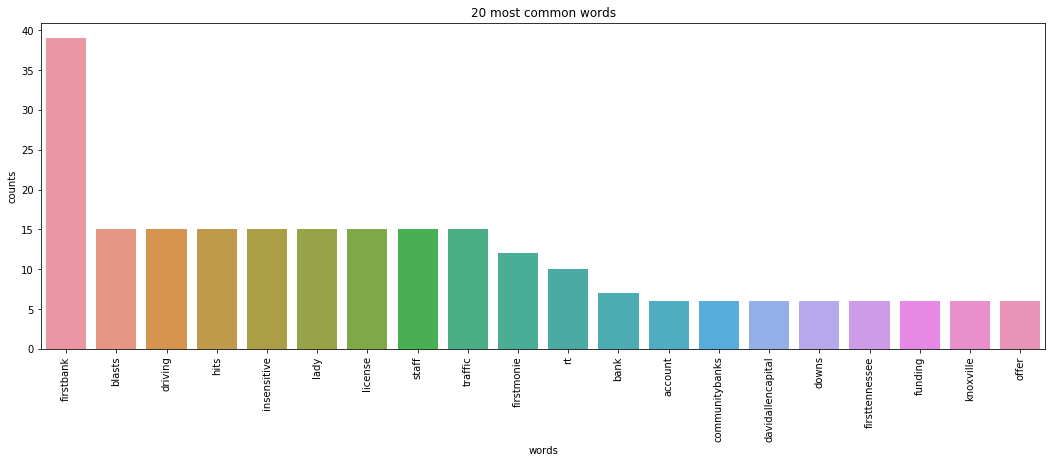

In [20]:
import seaborn as sns

def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=x_pos, y=counts)
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

        

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Tweets'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)



In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [9]:
df['scores'] = df['Tweets'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

#df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0  else 'neg')

df.loc[df['compound'] < 0 , 'Sentiment'] = 'Neg'  
df.loc[df['compound'] == 0 , 'Sentiment'] = 'Neu'
df.loc[df['compound']> 0 , 'Sentiment'] = 'Pos'

df

,Tweets,scores,compound,Sentiment
0,RT : If you have an account with better clos...,"{'neg': 0.145, 'neu': 0.742, 'pos': 0.113, 'co...",-0.2023,Neg
1,If you have an account with better close it ...,"{'neg': 0.215, 'neu': 0.697, 'pos': 0.088, 'co...",-0.6360,Neg
2,"""Hardships often prepare ordinary people for a...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neu
3,y can y'all grow??? Why are you people stagna...,"{'neg': 0.144, 'neu': 0.682, 'pos': 0.174, 'co...",0.3527,Pos
4,Learn More \n\n#rnetwork #revvcard #revvcardg...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neu
5,RT _udoh: First Bank of Nigeria are the worst ...,"{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",-0.6249,Neg
6,#Firstbank woke up this morning to see debit ...,"{'neg': 0.153, 'neu': 0.694, 'pos': 0.153, 'co...",0.0000,Neu
7,#CommunityBanks are partnering with #DavidAlle...,"{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'comp...",-0.3818,Neg
8,_help cc You claimed yesterday that this earl...,"{'neg': 0.132, 'neu': 0.792, 'pos': 0.076, 'co...",-0.4118,Neg
9,RT : Wow... it all started in 2014... saving t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neu


In [10]:
df['Tweets'][23]

'Lady blasts #FirstBank for being insensitive as it’s staff driving against traffic and without a license, hits\xa0someone  '

In [11]:
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['compound'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['compound'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['compound'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['Tweets'])))

Percentage of positive tweets: 25.53191489361702%
Percentage of neutral tweets: 14.893617021276595%
Percentage of negative tweets: 59.57446808510638%


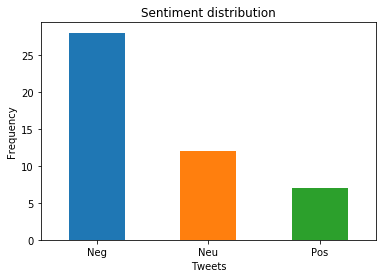

In [16]:
LABELS = ["Neg", "Neu", "Pos"]
count_classes = pd.value_counts(df['Sentiment'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Sentiment distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Tweets")
plt.ylabel("Frequency");